In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

In [21]:
# Load dataset
df = pd.read_csv("../data/community_health_dataset.csv")

In [22]:
# First 5 rows of the dataset
df.head()

,Participant ID,Age,Gender,SES,Service Type,Visit Frequency,Step Frequency (steps/min),Stride Length (m),Joint Angle (°),EMG Activity,Patient Satisfaction (1-10),Quality of Life Score
0,1,56,F,4,Rehab,Weekly,85,0.54,17.99,Low,1,57
1,2,69,M,1,Preventive,Yearly,80,0.70,13.05,Moderate,8,94
2,3,46,M,4,Rehab,Yearly,81,0.57,29.85,Moderate,4,66
3,4,32,F,1,Consultation,Weekly,66,0.78,28.54,Moderate,9,66
4,5,60,M,3,Preventive,Weekly,73,0.84,20.80,High,5,98


In [23]:
# Variable
print(df.dtypes)

Participant ID                   int64
Age                              int64
Gender                          object
SES                              int64
Service Type                    object
Visit Frequency                 object
Step Frequency (steps/min)       int64
Stride Length (m)              float64
Joint Angle (°)                float64
EMG Activity                    object
Patient Satisfaction (1-10)      int64
Quality of Life Score            int64
dtype: object


In [24]:
# Summary statistics
df.describe()

,Participant ID,Age,SES,Step Frequency (steps/min),Stride Length (m),Joint Angle (°),Patient Satisfaction (1-10),Quality of Life Score
count,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000
mean,174.000000,43.374640,2.357349,80.123919,0.751499,20.057378,5.213256,74.195965
std,100.314505,15.177304,1.129848,11.257582,0.143221,5.807653,2.833643,13.949400
min,1.000000,18.000000,1.000000,60.000000,0.500000,10.060000,1.000000,50.000000
25%,87.500000,31.000000,1.000000,71.000000,0.620000,15.065000,3.000000,62.000000
50%,174.000000,43.000000,2.000000,81.000000,0.760000,20.190000,5.000000,74.000000
75%,260.500000,56.000000,3.000000,90.000000,0.860000,25.220000,8.000000,86.000000
max,347.000000,69.000000,4.000000,99.000000,1.000000,29.970000,10.000000,99.000000


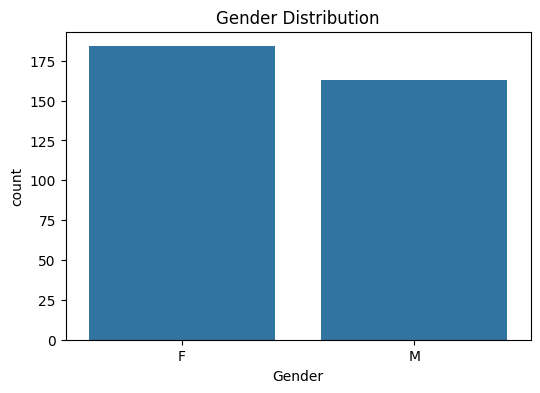

In [25]:
# Gender distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()

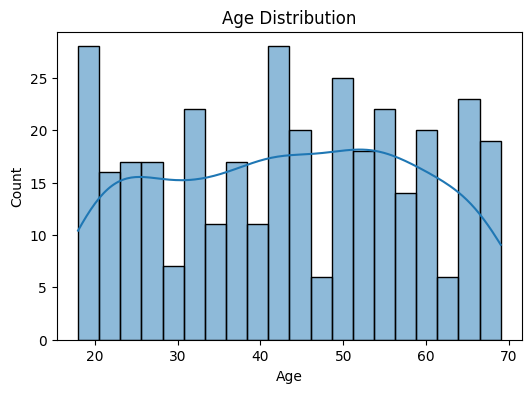

In [26]:
# Age distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], kde=True, bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

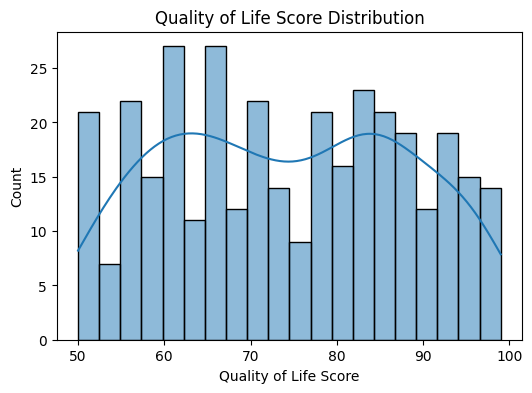

In [27]:
# BMI distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Quality of Life Score'], kde=True, bins=20)
plt.title("Quality of Life Score Distribution")
plt.xlabel("Quality of Life Score")
plt.show()

In [28]:
# ================ Descriptive Statistics ================
# Descriptive statistics for numerical variables

In [29]:
# Mean, Median, Mode
for col in ['Age', 'Quality of Life Score']:
    print(f"\n--- {col} ---")
    print(f"Mean: {df[col].mean():.2f}")
    print(f"Median: {df[col].median():.2f}")
    print(f"Mode: {df[col].mode().values[0]:.2f}")


--- Age ---
Mean: 43.37
Median: 43.00
Mode: 41.00

--- Quality of Life Score ---
Mean: 74.20
Median: 74.00
Mode: 62.00


In [30]:
for col in ['Age', 'Quality of Life Score']:
    print(f"\n--- {col} ---")
    print(f"Standard Deviation: {df[col].std():.2f}")
    print(f"Variance: {df[col].var():.2f}")
    print(f"Range: {df[col].max() - df[col].min():.2f}")



--- Age ---
Standard Deviation: 15.18
Variance: 230.35
Range: 51.00

--- Quality of Life Score ---
Standard Deviation: 13.95
Variance: 194.59
Range: 49.00


In [31]:
for col in ['Age', 'Quality of Life Score']:
    print(f"\n--- {col} ---")
    print(f"Skewness: {skew(df[col]):.2f}")
    print(f"Kurtosis: {kurtosis(df[col]):.2f}")


--- Age ---
Skewness: -0.04
Kurtosis: -1.16

--- Quality of Life Score ---
Skewness: 0.02
Kurtosis: -1.16


## Interpretation of Descriptive Statistics

### Age
- The **mean age** is **43.37**, with a **median of 43** and a **mode of 41**, suggesting a nearly symmetric distribution.
- The values of the mean, median, and mode are quite close, which reinforces the idea of a **balanced age distribution** without strong skew.
- The **standard deviation is 15.18**, indicating a moderate spread of ages across the sample.
- With a **range of 51 years**, the data covers a **wide age spectrum**, likely capturing young adults through older individuals.
- This spread provides a solid basis for age-related subgroup analysis.

### Quality of Life Score
- The **mean score is 74.20**, **median is 74**, and **mode is 62**, suggesting a slightly **left-skewed** distribution (more people reporting higher quality of life, but some clustering around lower scores).
- The **standard deviation of 13.95** and **range of 49 points** indicate a **broad variability** in how respondents rate their quality of life.
- This variability might reflect differences in health behaviors, income, education, or chronic conditions.
- The fact that the mode (62) is significantly lower than the mean also suggests **a possible cluster of individuals reporting poorer quality of life**, even though the average is relatively high.
